## Clustered Insights: Unveiling Penguin Species with Unsupervised Learning

![Penguins Artwork by @allison_horst](images/penguins_artwork.png)

**Import necessary modules**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# ignore all warnings in the notebook
import warnings
warnings.filterwarnings('ignore')

### 1. Loading and exploring the dataset

- create a pandas DataFrame and examine `"data/penguins.csv"` for data types and missing values. 
- store the DataFrame in `df_penguins` variable.

In [2]:
# import our primary Arctic Penguins dataset using pandas's `read_csv()` method
df_penguins = pd.read_csv('data/penguins.csv')
print('Data read into a pandas dataframe!')

df_penguins.head()
# tip: You can specify the number of rows you'd like to see as follows: df_can.head(10) 

Data read into a pandas dataframe!


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
# we can also view the bottom 5 rows of the dataset using the `tail()` function.
df_penguins.tail()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE
343,49.9,16.1,213.0,5400.0,MALE


When analyzing a dataset, it's always a good idea to start by getting basic information about your dataframe. We can do this by using the `info()` method.

This method can be used to get a short summary of the dataframe.

In [4]:
df_penguins.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Columns: 5 entries, culmen_length_mm to sex
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


To get the list of column headers you can call upon the data frame's `columns` instance variable.


In [5]:
df_penguins.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

Similarly, to get the list of indices we use the `.index` instance variables.

In [6]:
df_penguins.index

RangeIndex(start=0, stop=344, step=1)

To view the dimensions of the dataframe, we use the `shape` instance variable of it.

In [7]:
df_penguins.shape

(344, 5)

### 2. Dealing with null values and outliers

- using the information gained in the previous step, identify outliers and null values and remove them.

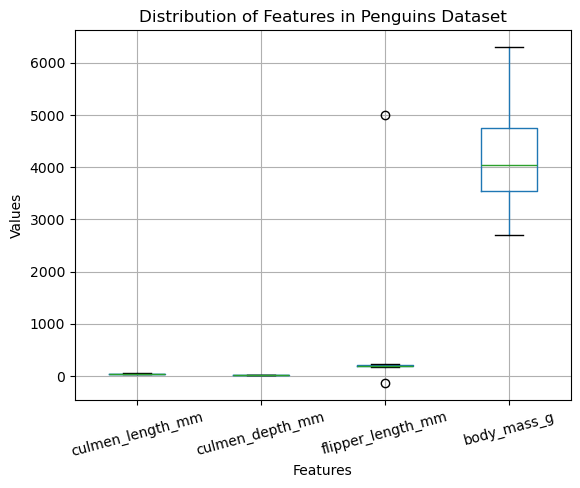

In [8]:
# create the box plot to visualize outliers if any
df_penguins.boxplot(rot=15) # rotated x-axis label

# set plot title and axis labels
plt.title("Distribution of Features in Penguins Dataset")
plt.xlabel("Features")
plt.ylabel("Values")

# show the plot
plt.show()

You can check to see how many null objects we have in the dataset as follows:

In [9]:
df_penguins.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

Remove the rows containing NaN values:

In [10]:
penguins_clean = df_penguins.dropna()

In [11]:
print(df_penguins.shape)       
print(penguins_clean.shape)    # 344 - 335 = 9 rows containing NaN values are removed

(344, 5)
(335, 5)


In [12]:
# outliers
penguins_clean[(penguins_clean['flipper_length_mm'] > 4000) | (penguins_clean['flipper_length_mm'] < 0)]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
9,42.0,20.2,5000.0,4250.0,MALE
14,34.6,21.1,-132.0,4400.0,MALE


Now, you can remove the outliers at indices 9 and 14 as below:

In [13]:
penguins_clean = penguins_clean.drop([9,14])

In [14]:
penguins_clean.shape

(333, 5)

We improved the data quality for further analysis.

### 3. Perform preprocessing steps on the dataset to create dummy variables

- create dummy variables for the available categorical feature in the dataset, then drop the original column.

In [15]:
penguins_clean.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE


In [16]:
df = pd.get_dummies(penguins_clean).drop('sex_.', axis=1)

In [17]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True
1,39.5,17.4,186.0,3800.0,True,False
2,40.3,18.0,195.0,3250.0,True,False
4,36.7,19.3,193.0,3450.0,True,False
5,39.3,20.6,190.0,3650.0,False,True


### 4. Perform preprocessing steps on the dataset - scaling

- utilize an available preprocessing function to standardize the features in the dataset and prepare it for the unsupervised learning algorithms. 
- create a preprocessed DataFrame for the PCA process.

In [18]:
scaler = StandardScaler()

X = scaler.fit_transform(df)
penguins_preprocessed = pd.DataFrame(data=X, columns=df.columns)

In [19]:
penguins_preprocessed.head(12)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.905520,0.793126,-1.428125,-0.569709,-0.991031,0.997001
1,-0.831938,0.128503,-1.071522,-0.507579,1.009050,-1.003008
2,-0.684775,0.435252,-0.429637,-1.191006,1.009050,-1.003008
3,-1.347011,1.099875,-0.572278,-0.942487,1.009050,-1.003008
4,-0.868729,1.764498,-0.786240,-0.693968,-0.991031,0.997001
5,-0.942311,0.333002,-1.428125,-0.725033,1.009050,-1.003008
6,-0.887125,1.253249,-0.429637,0.579691,-0.991031,0.997001
7,-0.537611,0.230753,-1.356804,-1.253136,1.009050,-1.003008
8,-0.997497,2.071247,-0.714919,-0.507579,-0.991031,0.997001
9,-1.365406,0.333002,-1.142843,-0.631839,1.009050,-1.003008


### 5. Perform PCA

- perform `PCA()`, without specifying the number of components, to determine the explained variance ratio versus the number of principal components. 
- detect the number of components that have more than 10% explained variance ratio.
- finally, create a variable named `n_components` to store the optimal number of components determined by the analysis, and run the PCA while setting `n_components`.

In [20]:
# perform PCA to determine the desired number of components
pca = PCA(n_components=None)
dfx_pca = pca.fit(penguins_preprocessed)
dfx_pca.explained_variance_ratio_

array([0.51973484, 0.34424041, 0.08591863, 0.03225427, 0.01686049,
       0.00099136])

In [21]:
# calculate the number of components with an explained variance ratio above 10%
n_components = sum(dfx_pca.explained_variance_ratio_ > 0.1)
n_components

2

In [22]:
# execute PCA using the determined number of components
pca = PCA(n_components=n_components)
penguins_PCA = pca.fit_transform(penguins_preprocessed)

### 6. Detect the optimal number of clusters for k-means clustering

- perform Elbow analysis to determine the optimal number of clusters for this dataset. 
- store the optimal number of clusters in the `n_clusters` variable.

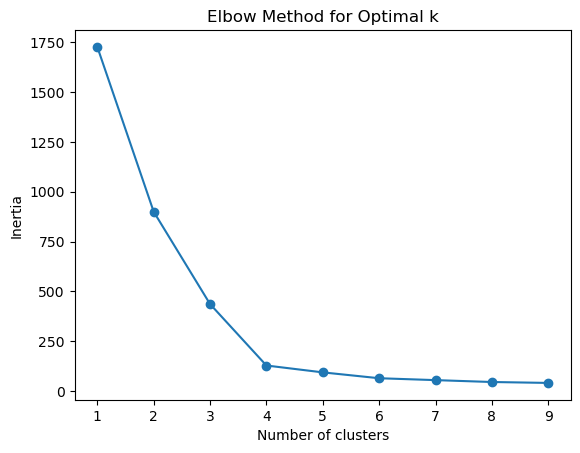

In [23]:
# determine the optimal number of clusters using elbow method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(penguins_PCA)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [24]:
# determine the elbow point, which is the optimal number of clusters
n_clusters = 4

### 7. Run the k-means clustering algorithm

- using the optimal number of clusters obtained from the previous step, run the k-means clustering algorithm once more on the preprocessed data.

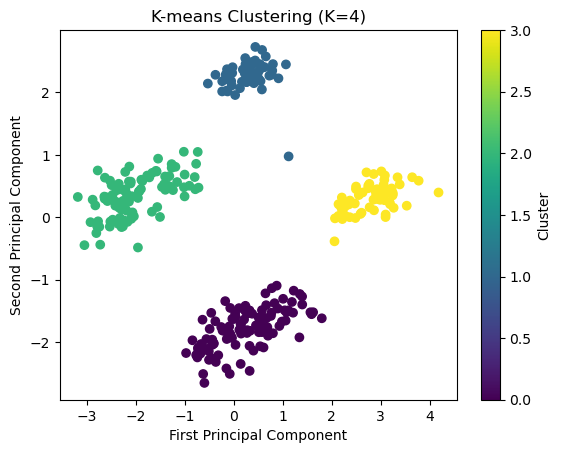

In [25]:
# create and fit the k-means cluster model
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_PCA)

# visualize the clusters using the first two principal components
# plt.figure(figsize=(10, 6))
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'K-means Clustering (K={n_clusters})')
plt.colorbar(label='Cluster')
# plt.legend()
plt.show()

### 8. Create a final statistical DataFrame for each cluster

In [26]:
penguins_clean.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

In [27]:
# add the cluster labels to the penguins_clean DataFrame
penguins_clean['label'] = kmeans.labels_

# display the first few rows of the updated DataFrame
penguins_clean.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,label
0,39.1,18.7,181.0,3750.0,MALE,0
1,39.5,17.4,186.0,3800.0,FEMALE,2
2,40.3,18.0,195.0,3250.0,FEMALE,2
4,36.7,19.3,193.0,3450.0,FEMALE,2
5,39.3,20.6,190.0,3650.0,MALE,0


In [28]:
penguins_clean['label'].value_counts()

label
2    107
0    106
3     61
1     59
Name: count, dtype: int64

In [29]:
# stats
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'label']

stats_penguins = penguins_clean[numeric_columns].groupby('label').mean()
stats_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,43.878302,19.111321,194.764151
1,45.545763,14.262712,212.779661
2,40.217757,17.611215,189.046729
3,49.473770,15.718033,221.540984
